# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# API call documentation from openweathermap for 'by city name'
# api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}&unit=imperial
url = "http://api.openweathermap.org/data/2.5/weather?"

# variable lists to fill in for loop for df later
city_name = []
city_lat = []
city_lon = []
city_max_temp = []
city_hum = []
city_cloud = []
city_wind = []
city_cntry = []
city_date = []

print(f"Beginning Data Retrieval")
print("--------------------------")

count=1

for city in cities:
    try:
        # build query url inputing current city, API key, and unit of measure to return
        query_url = f'{url}q={city}&appid={weather_api_key}&units=imperial'
        weather_response = requests.get(query_url).json()
#         print(f"Processing record {count} | City Name: {city}")

        # gather data from cities and store as a variable containing a list of dictionaries 
        # city name, lat, lng, max temp, humidity cloudiness, wind speed, country, date
        city_name.append(weather_response['name'])
        city_lat.append(weather_response['coord']['lat'])
        city_lon.append(weather_response['coord']['lon'])
        city_max_temp.append(weather_response['main']['temp_max'])
        city_hum.append(weather_response['main']['humidity'])
        city_cloud.append(weather_response['clouds']['all'])
        city_wind.append(weather_response['wind']['speed'])
        city_cntry.append(weather_response['sys']['country'])
        city_date.append(weather_response['dt'])

    except:
#         print(f"Skipping, NOT FOUND: Record {count} | City Name: {city}")
        pass
    count = count + 1


print("Data Retrieval Complete")

Beginning Data Retrieval
--------------------------
Data Retrieval Complete


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_data_df = pd.DataFrame({"City Name": city_name,
                          "Latitude":city_lat,
                          "Longitude":city_lon,
                          "Max Temp. (F)":city_max_temp,
                          "Humidity (%)":city_hum,
                          "Cloudiness (%)":city_cloud,
                          "Wind Speed (mph)":city_wind,
                          "Country":city_cntry,
                          "Date (UTC)":city_date})
city_data_df.to_csv(output_data_file, encoding="utf-8", index=False)
city_data_df.head(25)
# print(len(city_data_df["City Name"]))
# print(len(city_lat))

,City Name,Latitude,Longitude,Max Temp. (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date (UTC)
0,Vuktyl,63.8567,57.3094,13.28,96,100,8.79,RU,1612285618
1,Tuktoyaktuk,69.4541,-133.0374,-29.20,68,1,5.75,CA,1612285618
2,Dikson,73.5069,80.5464,-21.01,82,46,13.56,RU,1612285619
3,Laas,46.6166,10.7002,39.00,75,0,4.61,IT,1612285619
4,Yako,12.9667,-2.2667,93.07,8,0,9.19,BF,1612285619
5,Fare,-16.7000,-151.0167,80.83,76,9,15.28,PF,1612285619
6,Måløy,61.9353,5.1136,26.01,80,0,5.75,NO,1612285621
7,Punta Arenas,-53.1500,-70.9167,64.40,55,40,18.41,CL,1612285621
8,Barrow,71.2906,-156.7887,-25.60,68,1,12.66,US,1612285354
9,São Filipe,14.8961,-24.4956,75.78,66,5,9.98,CV,1612285621


## Inspect the data and remove the cities where the humidity > 100%.
----

In [5]:
# remove all cities with a humidity marked at higher than 100%
clean_city_data = city_data_df.loc[city_data_df["Humidity (%)"] <= 100]
clean_city_data.head(25)
# print(len(clean_city_data["City Name"]))

,City Name,Latitude,Longitude,Max Temp. (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date (UTC)
0,Vuktyl,63.8567,57.3094,13.28,96,100,8.79,RU,1612285618
1,Tuktoyaktuk,69.4541,-133.0374,-29.20,68,1,5.75,CA,1612285618
2,Dikson,73.5069,80.5464,-21.01,82,46,13.56,RU,1612285619
3,Laas,46.6166,10.7002,39.00,75,0,4.61,IT,1612285619
4,Yako,12.9667,-2.2667,93.07,8,0,9.19,BF,1612285619
5,Fare,-16.7000,-151.0167,80.83,76,9,15.28,PF,1612285619
6,Måløy,61.9353,5.1136,26.01,80,0,5.75,NO,1612285621
7,Punta Arenas,-53.1500,-70.9167,64.40,55,40,18.41,CL,1612285621
8,Barrow,71.2906,-156.7887,-25.60,68,1,12.66,US,1612285354
9,São Filipe,14.8961,-24.4956,75.78,66,5,9.98,CV,1612285621


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

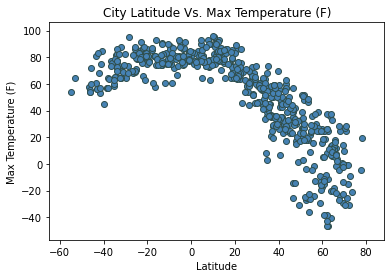

In [6]:
plt.scatter(clean_city_data["Latitude"],clean_city_data["Max Temp. (F)"], marker="o", facecolors="steelblue", edgecolors="darkslategrey")
plt.title("City Latitude Vs. Max Temperature (F)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlim(min(clean_city_data["Latitude"])-10, max(clean_city_data["Latitude"])+10)
plt.ylim(min(clean_city_data["Max Temp. (F)"])-10, max(clean_city_data["Max Temp. (F)"])+10)
plt.show()

## Latitude vs. Humidity Plot

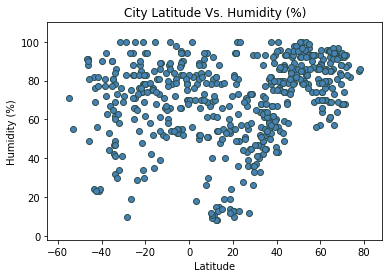

In [7]:
plt.scatter(clean_city_data["Latitude"],clean_city_data["Humidity (%)"], marker="o", facecolors="steelblue", edgecolors="darkslategrey")
plt.title("City Latitude Vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(min(clean_city_data["Latitude"])-10, max(clean_city_data["Latitude"])+10)
plt.ylim(min(clean_city_data["Humidity (%)"])-10, max(clean_city_data["Humidity (%)"])+10)
plt.show()

## Latitude vs. Cloudiness Plot

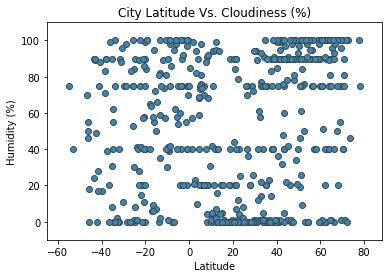

In [8]:
plt.scatter(clean_city_data["Latitude"],clean_city_data["Cloudiness (%)"], marker="o", facecolors="steelblue", edgecolors="darkslategrey")
plt.title("City Latitude Vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(min(clean_city_data["Latitude"])-10, max(clean_city_data["Latitude"])+10)
plt.ylim(min(clean_city_data["Cloudiness (%)"])-10, max(clean_city_data["Cloudiness (%)"])+10)
plt.show()

## Latitude vs. Wind Speed Plot

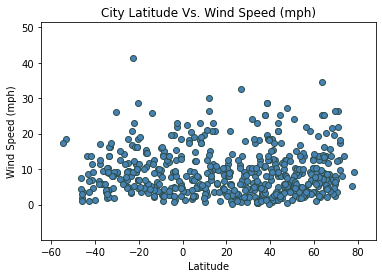

In [9]:
plt.scatter(clean_city_data["Latitude"],clean_city_data["Wind Speed (mph)"], marker="o", facecolors="steelblue", edgecolors="darkslategrey")
plt.title("City Latitude Vs. Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(min(clean_city_data["Latitude"])-10, max(clean_city_data["Latitude"])+10)
plt.ylim(min(clean_city_data["Wind Speed (mph)"])-10, max(clean_city_data["Wind Speed (mph)"])+10)
plt.show()

## Linear Regression

In [67]:
# dataframe for referencing northern and southern hemisphere
no_hem = clean_city_data.loc[clean_city_data["Latitude"]>= 0]
so_hem = clean_city_data.loc[clean_city_data["Latitude"]< 0]

#x-axis variable
nx_values = no_hem["Latitude"]
sx_values = so_hem["Latitude"]

### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r-value: -0.86
r-squared: 0.74


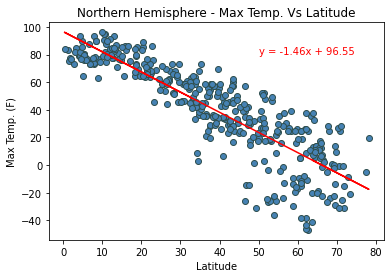

In [95]:
# y-axis variable
nty_values = no_hem["Max Temp. (F)"]

#correlation:
(slope, intercept, rvalue, pvalue, stderr) = linregress(nx_values, nty_values)
regress_values = nx_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#print statements and plotting
# print(correlation)
print(f"r-value: {round(rvalue,2)}")
print(f"r-squared: {round(rvalue**2,2)}")
plt.scatter(nx_values, nty_values, marker="o", facecolors="steelblue", edgecolors="darkslategrey")
plt.plot(nx_values, regress_values, "r-")
plt.annotate(line_eq, (50,80), fontsize=10, color="red")
plt.xlim = (min(nx_values)-10, max(nx_values)+10)
plt.ylim = (min(nty_values)-10, max(nty_values)+10)
plt.xlabel("Latitude")
plt.ylabel("Max Temp. (F)")
plt.title("Northern Hemisphere - Max Temp. Vs Latitude")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r-value: 0.55
r-squared: 0.31


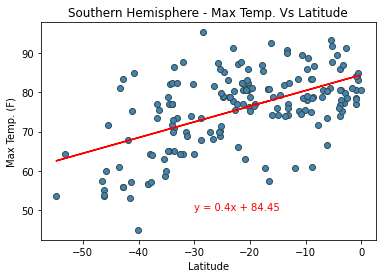

In [81]:
# y-axis variable
sty_values = so_hem["Max Temp. (F)"]

#correlation:
(slope, intercept, rvalue, pvalue, stderr) = linregress(sx_values, sty_values)
regress_values = sx_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#print statements and plotting
# print(correlation)
print(f"r-value: {round(rvalue,2)}")
print(f"r-squared: {round(rvalue**2,2)}")
plt.scatter(sx_values, sty_values, marker="o", facecolors="steelblue", edgecolors="darkslategrey")
plt.plot(sx_values, regress_values, "r-")
plt.annotate(line_eq, (-30,50), fontsize=10, color="red")
plt.xlim = (min(sx_values)-10, max(sx_values)+10)
plt.ylim = (min(sty_values)-10, max(sty_values)+10)
plt.xlabel("Latitude")
plt.ylabel("Max Temp. (F)")
plt.title("Southern Hemisphere - Max Temp. Vs Latitude")
plt.show()

Based on the two plots about, the linear regression is shows that as the latitude increases (moves away from the equator), the max temperature decreases. In other words, there is a positive correlation between max temperature and closeness to the equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-value: 0.45
r-squared: 0.21


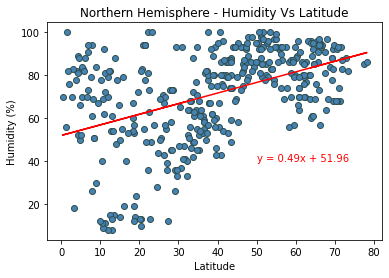

In [82]:
# y-axis variable
nhy_values = no_hem["Humidity (%)"]

#correlation:
(slope, intercept, rvalue, pvalue, stderr) = linregress(nx_values, nhy_values)
regress_values = nx_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#print statements and plotting
# print(correlation)
print(f"r-value: {round(rvalue,2)}")
print(f"r-squared: {round(rvalue**2,2)}")
plt.scatter(nx_values, nhy_values, marker="o", facecolors="steelblue", edgecolors="darkslategrey")
plt.plot(nx_values, regress_values, "r-")
plt.annotate(line_eq, (50,40), fontsize=10, color="red")
plt.xlim = (min(nx_values)-10, max(nx_values)+10)
plt.ylim = (min(nhy_values)-10, max(nhy_values)+10)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Humidity Vs Latitude")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-value: 0.18
r-squared: 0.03


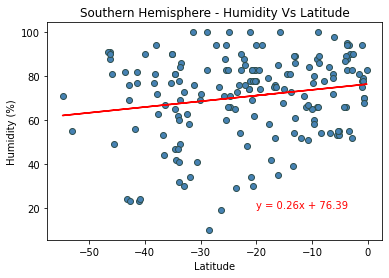

In [96]:
# y-axis variable
shy_values = so_hem["Humidity (%)"]

#correlation:
(slope, intercept, rvalue, pvalue, stderr) = linregress(sx_values, shy_values)
regress_values = sx_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#print statements and plotting
# print(correlation)
print(f"r-value: {round(rvalue,2)}")
print(f"r-squared: {round(rvalue**2,2)}")
plt.scatter(sx_values, shy_values, marker="o", facecolors="steelblue", edgecolors="darkslategrey")
plt.plot(sx_values, regress_values, "r-")
plt.annotate(line_eq, (-20,20), fontsize=10, color="red")
plt.xlim = (min(sx_values)-10, max(sx_values)+10)
plt.ylim = (min(shy_values)-10, max(shy_values)+10)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Humidity Vs Latitude")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-value: 0.37
r-squared: 0.14


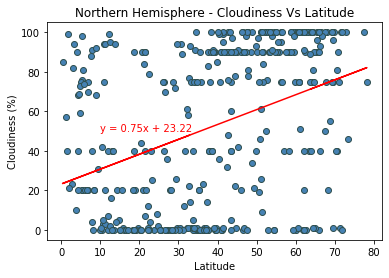

In [97]:
# y-axis variable
ncy_values = no_hem["Cloudiness (%)"]

#correlation:
(slope, intercept, rvalue, pvalue, stderr) = linregress(nx_values, ncy_values)
regress_values = nx_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#print statements and plotting
# print(correlation)
print(f"r-value: {round(rvalue,2)}")
print(f"r-squared: {round(rvalue**2,2)}")
plt.scatter(nx_values, ncy_values, marker="o", facecolors="steelblue", edgecolors="darkslategrey")
plt.plot(nx_values, regress_values, "r-")
plt.annotate(line_eq, (10,50), fontsize=10, color="red")
plt.xlim = (min(nx_values)-10, max(nx_values)+10)
plt.ylim = (min(ncy_values)-10, max(ncy_values)+10)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness Vs Latitude")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-value: 0.26
r-squared: 0.07


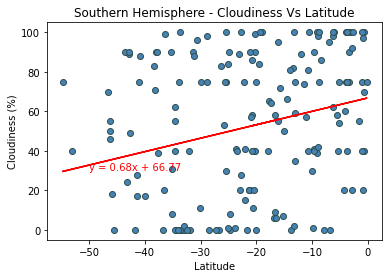

In [104]:
# y-axis variable
scy_values = so_hem["Cloudiness (%)"]

#correlation:
(slope, intercept, rvalue, pvalue, stderr) = linregress(sx_values, scy_values)
regress_values = sx_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#print statements and plotting
# print(correlation)
print(f"r-value: {round(rvalue,2)}")
print(f"r-squared: {round(rvalue**2,2)}")
plt.scatter(sx_values, scy_values, marker="o", facecolors="steelblue", edgecolors="darkslategrey")
plt.plot(sx_values, regress_values, "r-")
plt.annotate(line_eq, (-50,30), fontsize=10, color="red")
plt.xlim = (min(sx_values)-10, max(sx_values)+10)
plt.ylim = (min(scy_values)-10, max(scy_values)+10)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness Vs Latitude")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-value: 0.038
r-squared: 0.001


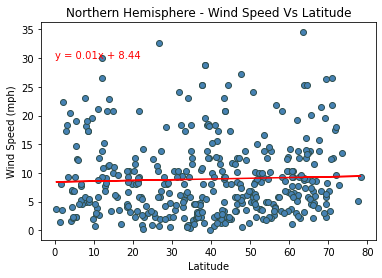

In [105]:
# y-axis variable
nwy_values = no_hem["Wind Speed (mph)"]

#correlation:
(slope, intercept, rvalue, pvalue, stderr) = linregress(nx_values, nwy_values)
regress_values = nx_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#print statements and plotting
# print(correlation)
print(f"r-value: {round(rvalue,3)}")
print(f"r-squared: {round(rvalue**2,3)}")
plt.scatter(nx_values, nwy_values, marker="o", facecolors="steelblue", edgecolors="darkslategrey")
plt.plot(nx_values, regress_values, "r-")
plt.annotate(line_eq, (0,30), fontsize=10, color="red")
plt.xlim = (min(nx_values)-10, max(nx_values)+10)
plt.ylim = (min(nwy_values)-10, max(nwy_values)+10)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed Vs Latitude")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-value: 0.042
r-squared: 0.002


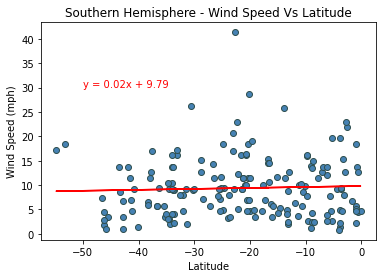

In [106]:
# y-axis variable
swy_values = so_hem["Wind Speed (mph)"]

#correlation:
(slope, intercept, rvalue, pvalue, stderr) = linregress(sx_values, swy_values)
regress_values = sx_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#print statements and plotting
# print(correlation)
print(f"r-value: {round(rvalue,3)}")
print(f"r-squared: {round(rvalue**2,3)}")
plt.scatter(sx_values, swy_values, marker="o", facecolors="steelblue", edgecolors="darkslategrey")
plt.plot(sx_values, regress_values, "r-")
plt.annotate(line_eq, (-50,30), fontsize=10, color="red")
plt.xlim = (min(sx_values)-10, max(sx_values)+10)
plt.ylim = (min(swy_values)-10, max(swy_values)+10)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Wind Speed Vs Latitude")
plt.show()